<img src="./images/banner.png" width="800">

# Handling Missing Data

Missing data is a common challenge in real-world datasets that can significantly impact the quality and reliability of our analyses. In this section, we'll explore what missing data is, why it occurs, and why it's crucial to address it properly.


Missing data refers to the absence of values in one or more variables within a dataset. It's represented in various ways, such as empty cells, NaN (Not a Number) values, or specific placeholders like -999 or 'N/A'. Missing data is not just an inconvenience; it can lead to biased analyses, reduced statistical power, and incorrect conclusions if not handled appropriately.


Missing data can occur for various reasons:

1. **Data Entry Errors:** Human errors during data input or recording.
2. **Equipment Malfunction:** Failures in data collection devices or sensors.
3. **Non-Response:** Participants in a survey choosing not to answer certain questions.
4. **Data Merging Issues:** Incomplete matches when combining datasets from different sources.
5. **Censoring:** Data that falls outside of measurable ranges.


The presence of missing data can have several consequences:

1. **Reduced Statistical Power:** Fewer data points can lead to less reliable statistical inferences.
2. **Bias:** If the missing data is not random, it can skew results and lead to incorrect conclusions.
3. **Computational Issues:** Many algorithms cannot handle missing values directly, requiring pre-processing.


💡 **Pro Tip:** Always investigate the nature and extent of missing data in your dataset before proceeding with analysis. Understanding the underlying reasons for missingness can guide your handling strategy.


Visualization can provide valuable insights into the patterns of missing data. Here's a simple example using Python and the missingno library:


In [1]:
%pip install missingno

Note: you may need to restart the kernel to use updated packages.


<Axes: >

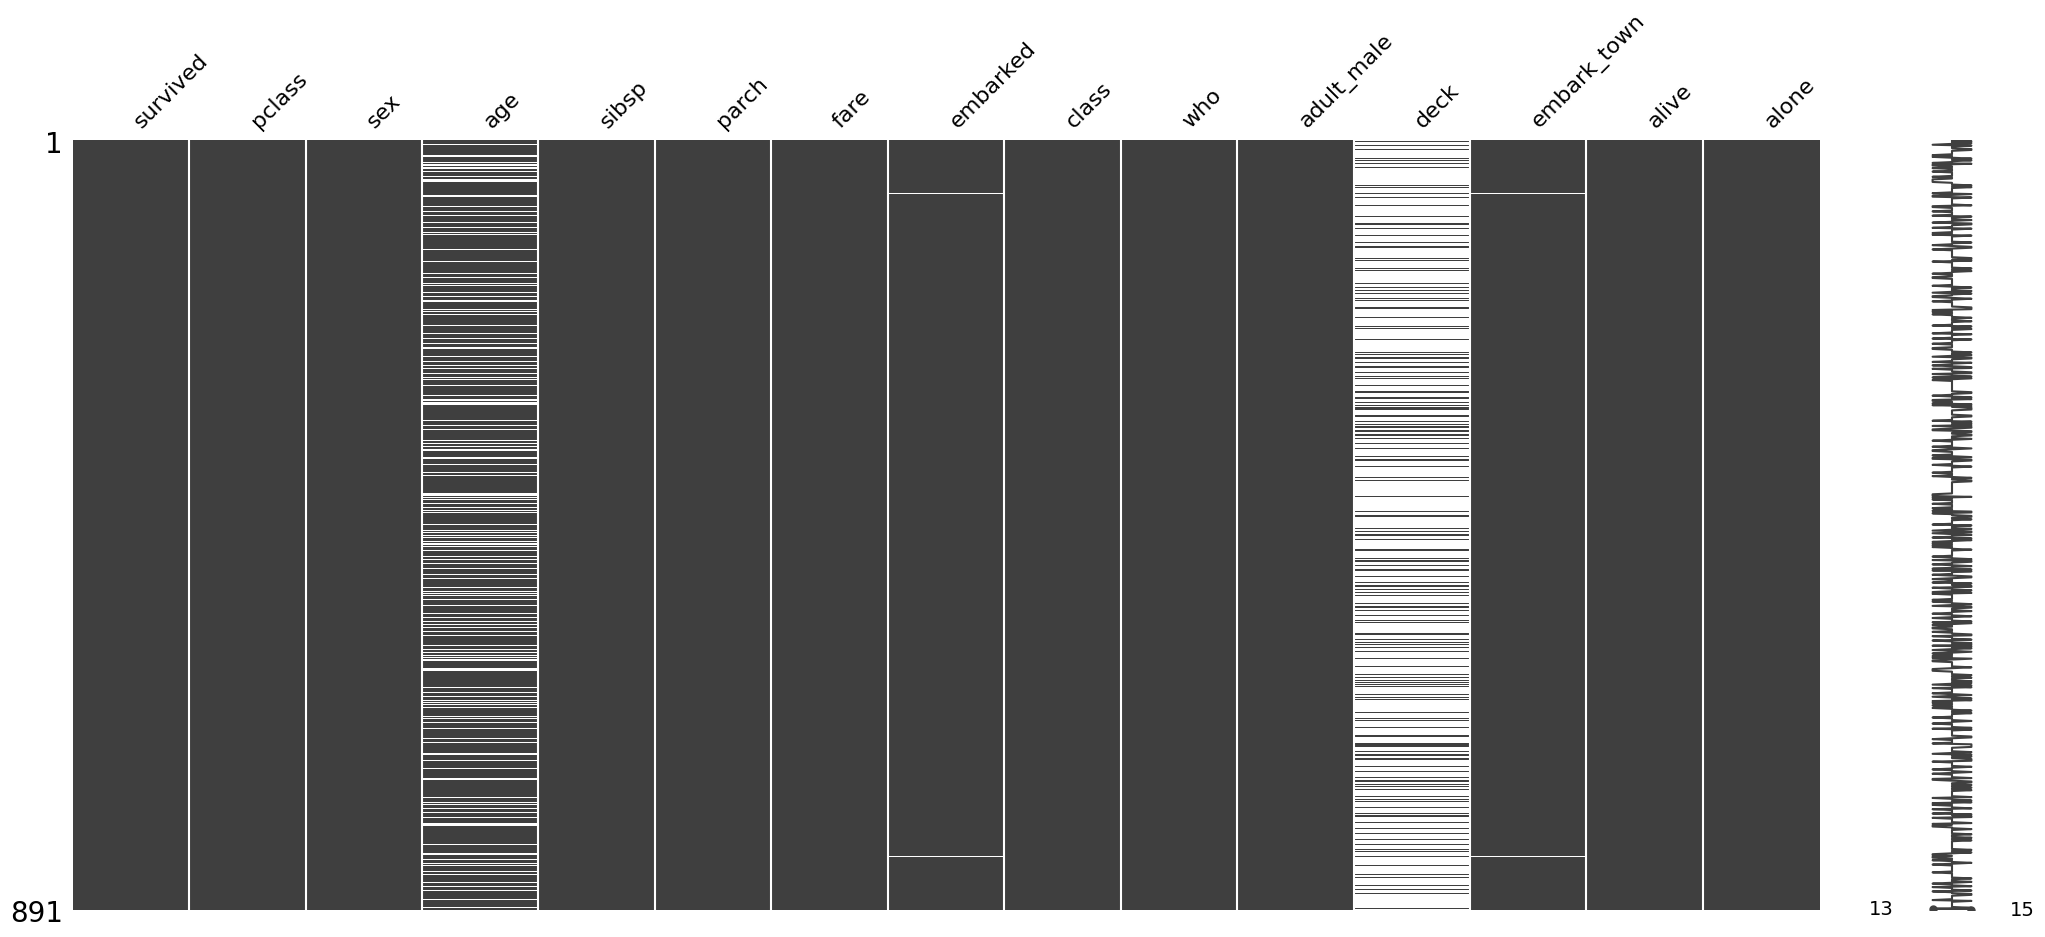

In [2]:
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt

df = sns.load_dataset("titanic")
msno.matrix(df)

<Axes: >

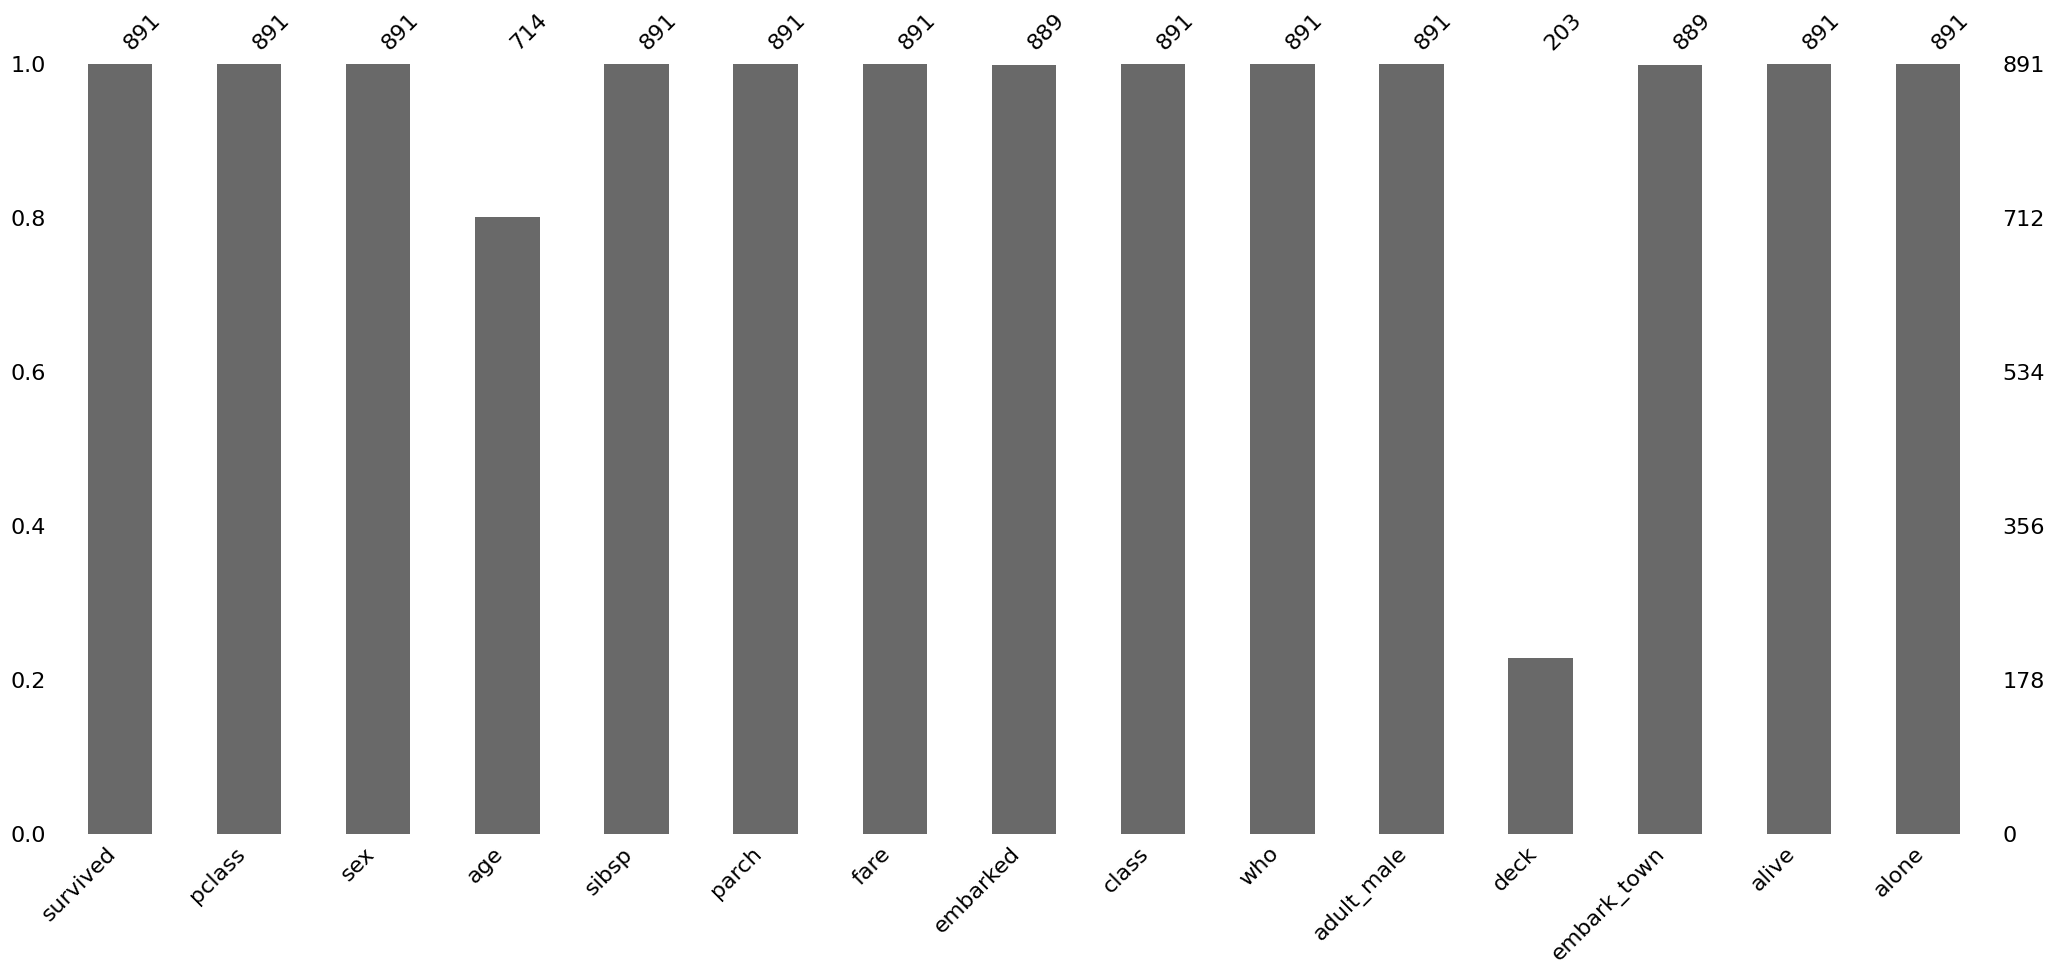

In [3]:
msno.bar(df)

This code generates a matrix plot where each column represents a variable, and each row represents an observation. White spaces indicate missing values, allowing you to visualize patterns of missingness across your dataset.


Properly handling missing data is crucial for several reasons:

1. **Data Integrity:** Ensures the reliability and validity of your analysis.
2. **Unbiased Results:** Helps maintain the representativeness of your sample.
3. **Model Performance:** Many machine learning algorithms perform better with complete datasets.


🤔 **Why This Matters:** The way you handle missing data can significantly influence your results. Ignoring or improperly treating missing data can lead to flawed insights and decisions.


Understanding the nature and impact of missing data is the first step in developing an effective strategy for handling it. In the following sections, we'll delve deeper into types of missing data and various techniques for addressing this common challenge in data analysis.

**Table of contents**<a id='toc0_'></a>    
- [Types of Missing Data](#toc1_)    
  - [Missing Completely at Random (MCAR)](#toc1_1_)    
  - [Missing at Random (MAR)](#toc1_2_)    
  - [Missing Not at Random (MNAR)](#toc1_3_)    
  - [Implications for Data Analysis](#toc1_4_)    
- [Detecting Missing Data](#toc2_)    
  - [Basic Detection Methods](#toc2_1_)    
  - [Visualizing Missing Data Patterns](#toc2_2_)    
  - [Detecting Hidden Missing Values](#toc2_3_)    
  - [Assessing the Impact of Missing Data](#toc2_4_)    
- [Imputation Techniques](#toc3_)    
  - [Simple Imputation Techniques](#toc3_1_)    
  - [Regression Imputation](#toc3_2_)    
  - [K-Nearest Neighbors (KNN) Imputation](#toc3_3_)    
  - [Time Series Imputation](#toc3_4_)    
  - [Multiple Imputation](#toc3_5_)    
- [Summary](#toc4_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## <a id='toc1_'></a>[Types of Missing Data](#toc0_)

Understanding the different types of missing data is crucial for choosing appropriate handling strategies. In this section, we'll explore the three main categories of missing data as defined by Rubin (1976) and discuss their implications for data analysis.


### <a id='toc1_1_'></a>[Missing Completely at Random (MCAR)](#toc0_)


Missing Completely at Random (MCAR) occurs when the probability of data being missing is the same for all observations. In other words, there's no relationship between whether a data point is missing and any values in the dataset, observed or missing.


🔑 **Key Concept:** MCAR is the "best" type of missing data because it doesn't introduce bias into your analysis.


MCAR data has several important characteristics. The missingness is unrelated to both the observed and unobserved data, and the complete cases form a random sample of all cases. For example, in a survey about income and job satisfaction, if some respondents accidentally skip questions with equal probability regardless of their income or satisfaction level, the missing data is MCAR.


### <a id='toc1_2_'></a>[Missing at Random (MAR)](#toc0_)


Missing at Random (MAR) occurs when the probability of missing data on a variable Y depends on other observed variables, but not on the values of Y itself. The key characteristic of MAR is that the missingness is related to observed data but not to the missing data itself. The pattern of missingness is predictable from other variables in the dataset.


For instance, in a medical study, older patients might be less likely to complete a strenuous physical assessment. The missing data in the assessment results is related to the age variable (which is observed) but not to the unobserved assessment results themselves.


💡 **Pro Tip:** MAR is more common than MCAR in real-world datasets. Many modern missing data techniques, such as multiple imputation, assume MAR.


### <a id='toc1_3_'></a>[Missing Not at Random (MNAR)](#toc0_)


Missing Not at Random (MNAR) occurs when the probability of missing data on a variable Y is related to the values of Y itself, even after controlling for other variables. The defining characteristic of MNAR is that the missingness is related to the unobserved data, and the missing data mechanism cannot be ignored and must be modeled.


An example of MNAR is a survey about income where high-income individuals might be less likely to disclose their income. The probability of missing data on income is related to the income itself, which is not fully observed.


❗️ **Important Note:** MNAR is the most problematic type of missing data because it can introduce significant bias into your analysis. Special techniques, often requiring additional assumptions or external data, are needed to handle MNAR data properly.


### <a id='toc1_4_'></a>[Implications for Data Analysis](#toc0_)


The type of missing data has important implications for how you should proceed with your analysis. For MCAR data, you can use complete case analysis (listwise deletion) without introducing bias, although you'll lose statistical power. With MAR data, methods like multiple imputation or maximum likelihood estimation are appropriate and can provide unbiased estimates. For MNAR data, you need to model the missing data mechanism explicitly, which often requires domain knowledge and sensitivity analyses.


🤔 **Why This Matters:** Correctly identifying the type of missing data in your dataset is crucial for selecting appropriate handling methods and understanding the potential biases in your analysis.


In practice, it's often difficult to definitively determine whether data is MAR or MNAR. Therefore, it's important to consider multiple approaches and conduct sensitivity analyses to assess the robustness of your results to different missing data assumptions. By understanding these types of missing data and their implications, you'll be better equipped to handle missing data challenges in your analyses effectively.

## <a id='toc2_'></a>[Detecting Missing Data](#toc0_)

Identifying and quantifying missing data is a crucial step in the data preprocessing pipeline. In this section, we'll explore various techniques to detect missing data in your dataset, understand its extent, and visualize its patterns.


### <a id='toc2_1_'></a>[Basic Detection Methods](#toc0_)


The first step in handling missing data is to identify where it exists in your dataset. Python's pandas library provides several useful functions for this purpose.


Let's start with some basic methods:


In [4]:
# Count missing values in each column
missing_counts = df.isnull().sum()

# Calculate percentage of missing values
missing_percentages = 100 * df.isnull().sum() / len(df)

# Combine counts and percentages in a single dataframe
missing_table = pd.concat(
    [missing_counts, missing_percentages],
    axis=1,
    keys=["Missing Count", "Missing Percentage"],
)
missing_table

,Missing Count,Missing Percentage
survived,0,0.000000
pclass,0,0.000000
sex,0,0.000000
age,177,19.865320
sibsp,0,0.000000
parch,0,0.000000
fare,0,0.000000
embarked,2,0.224467
class,0,0.000000
who,0,0.000000


This code snippet provides a summary of missing values for each column in your dataset, showing both the count and percentage of missing data.


💡 **Pro Tip:** Always check for both the count and percentage of missing values. A high count might seem alarming, but could be less significant if your dataset is very large.


### <a id='toc2_2_'></a>[Visualizing Missing Data Patterns](#toc0_)


Visualization can offer insights into the patterns of missingness that might not be apparent from summary statistics alone. The `missingno` library is an excellent tool for this purpose.


In [5]:
import missingno as msno

Text(0.5, 1.0, 'Matrix Plot of Missing Values')

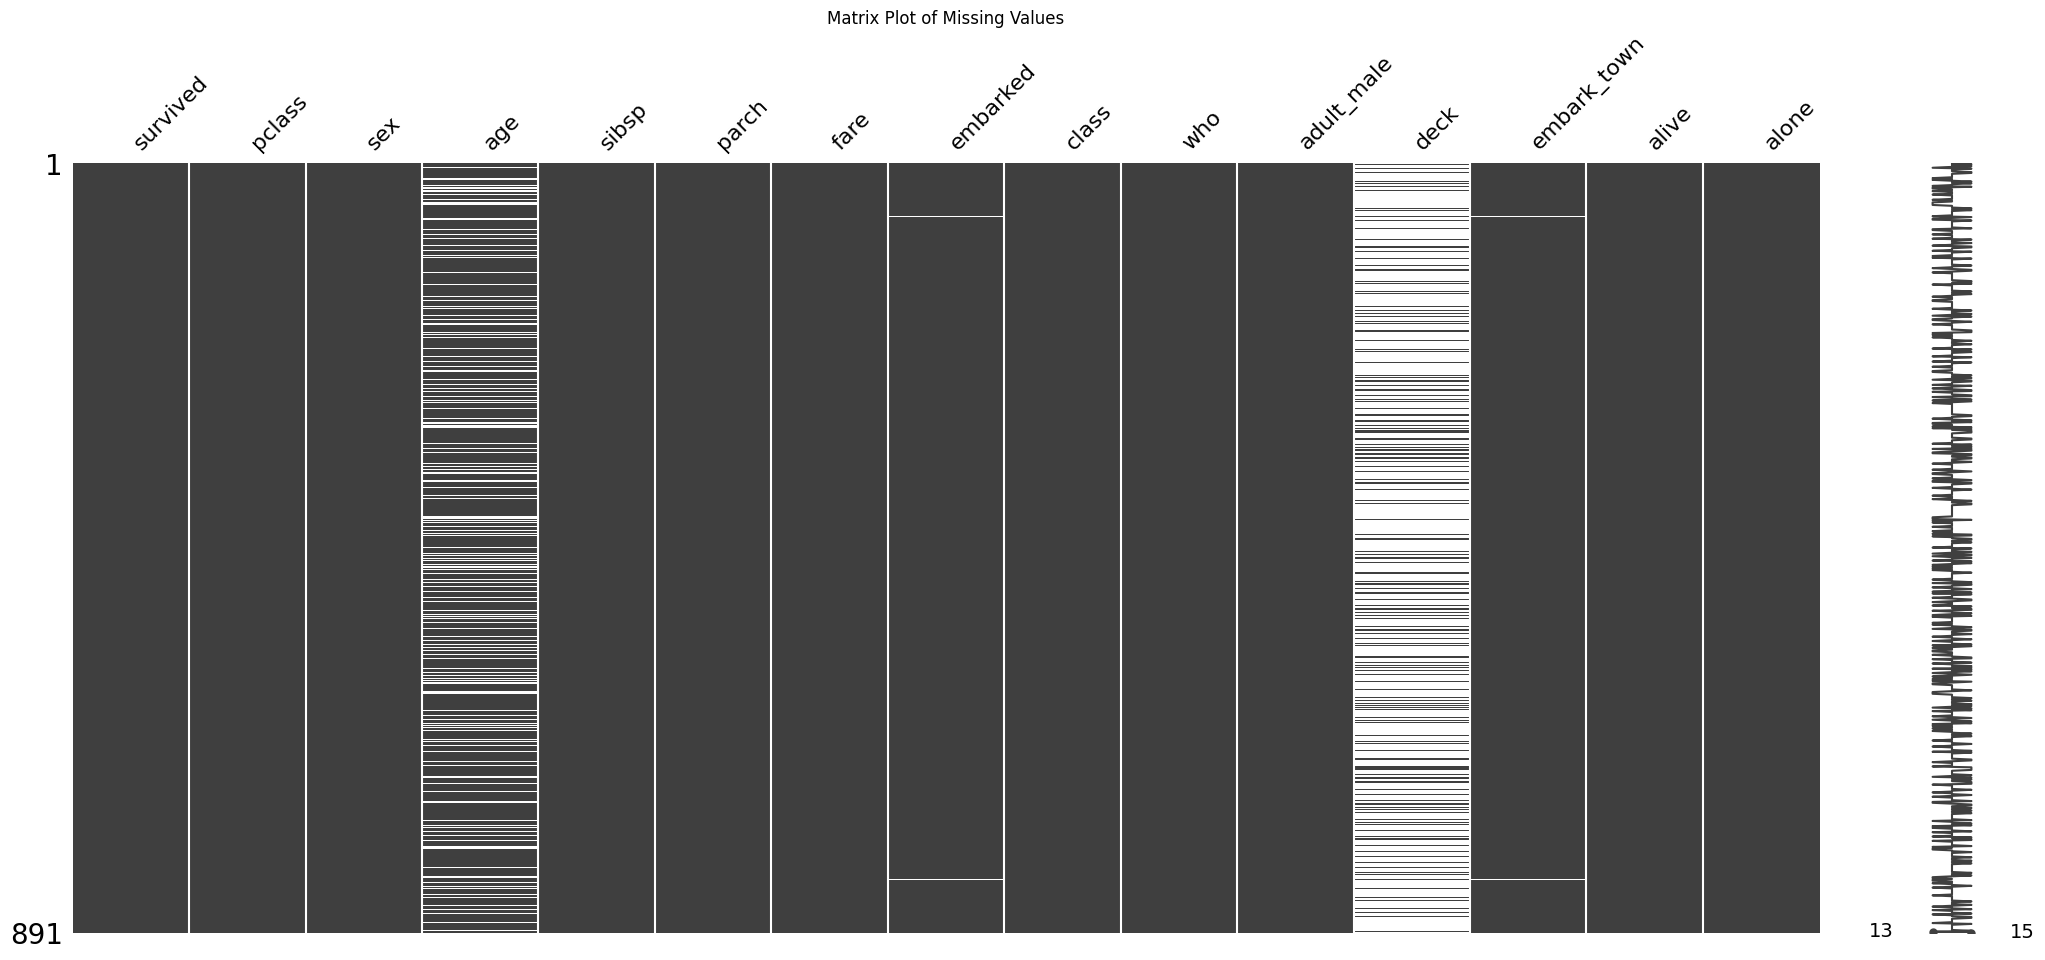

In [6]:
# Matrix plot
msno.matrix(df)
plt.title("Matrix Plot of Missing Values")

🔑 **Key Concept:** Visualizing missing data can reveal patterns that inform your handling strategy. For example, if missingness in one variable is highly correlated with missingness in another, this might suggest a MAR mechanism.


### <a id='toc2_3_'></a>[Detecting Hidden Missing Values](#toc0_)


Sometimes, missing values are not represented as `NaN` but as other placeholders like "N/A", "-999", or empty strings. It's important to identify and standardize these representations.


In [7]:
df.loc[0, "sex"] = "N/A"

# Check for suspicious values that might represent missing data
suspicious_values = ["N/A", "None", "-999", "", " "]

for column in df.columns:
    if df[column].dtype == "object":  # Only check string columns
        value_counts = df[column].value_counts()
        for value in suspicious_values:
            if value in value_counts.index:
                print(
                    f"Column '{column}' contains {value_counts[value]} instances of '{value}'"
                )

Column 'sex' contains 1 instances of 'N/A'


After identifying these hidden missing values, you should convert them to `NaN` for consistency:


In [8]:
import numpy as np

# Convert suspicious values to NaN
df.replace(suspicious_values, np.nan)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,NaN,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### <a id='toc2_4_'></a>[Assessing the Impact of Missing Data](#toc0_)


Understanding the extent of missing data is crucial for deciding how to handle it. Here's a way to categorize variables based on their missingness:


In [9]:
def categorize_missingness(df, threshold=5):
    missing_percentages = 100 * df.isnull().sum() / len(df)

    no_missing = missing_percentages[missing_percentages == 0].index.tolist()
    low_missing = missing_percentages[
        (missing_percentages > 0) & (missing_percentages <= threshold)
    ].index.tolist()
    high_missing = missing_percentages[missing_percentages > threshold].index.tolist()

    print(f"Variables with no missing data: {no_missing}")
    print(f"Variables with low missing data (<= {threshold}%): {low_missing}")
    print(f"Variables with high missing data (> {threshold}%): {high_missing}")


categorize_missingness(df)

Variables with no missing data: ['survived', 'pclass', 'sex', 'sibsp', 'parch', 'fare', 'class', 'who', 'adult_male', 'alive', 'alone']
Variables with low missing data (<= 5%): ['embarked', 'embark_town']
Variables with high missing data (> 5%): ['age', 'deck']


This function categorizes variables into those with no missing data, low missing data (<=5% by default), and high missing data (>5%).


🤔 **Why This Matters:** The extent of missing data in each variable can guide your handling strategy. Variables with a high percentage of missing data might need to be treated differently or even excluded from analysis.


By thoroughly detecting and understanding the missing data in your dataset, you set the foundation for making informed decisions about how to handle it. This understanding is crucial for maintaining the integrity of your data and ensuring the reliability of your subsequent analyses.

## <a id='toc3_'></a>[Imputation Techniques](#toc0_)

Imputation is the process of replacing missing data with substituted values. In this section, we'll explore various imputation techniques using real-world datasets: the Titanic dataset for general imputation and a modified version of the NYC Taxi dataset for time series imputation.


### <a id='toc3_1_'></a>[Simple Imputation Techniques](#toc0_)


Let's start with simple imputation techniques using the Titanic dataset.


In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

print(titanic.isnull().sum())

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


1. **Mean/Median Imputation**


In [11]:
# Mean imputation for 'age'
titanic["age_mean_imputed"] = titanic["age"].fillna(titanic["age"].mean())

In [12]:
# Median imputation for 'age'
titanic["age_median_imputed"] = titanic["age"].fillna(titanic["age"].median())

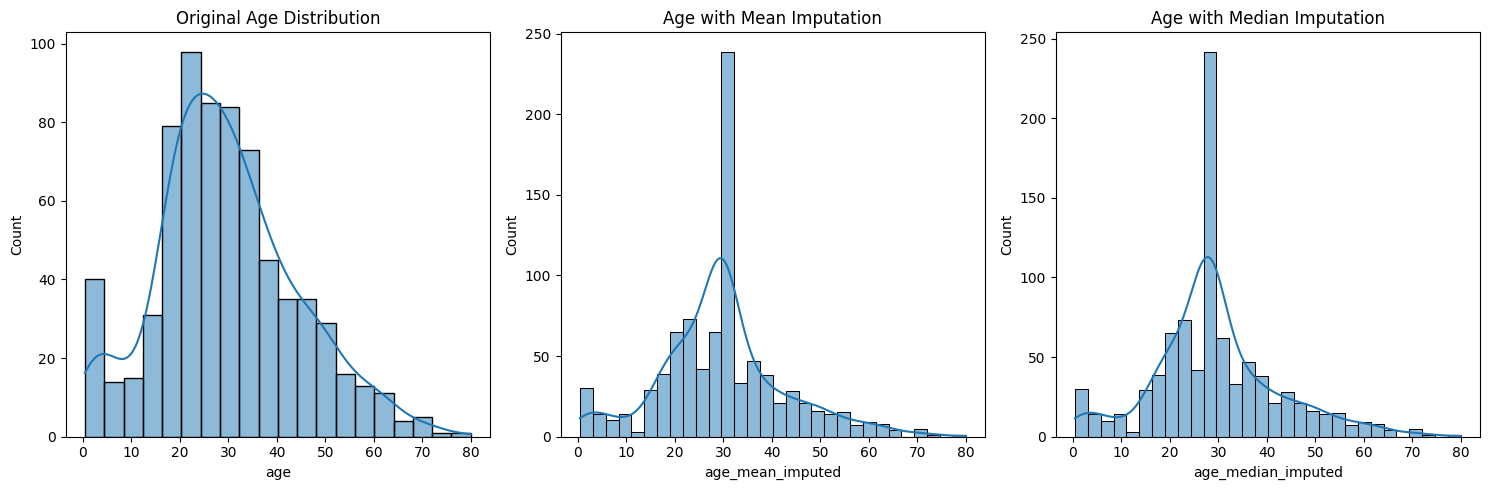

In [13]:
# Visualize the results
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(titanic["age"], kde=True, ax=ax1)
ax1.set_title("Original Age Distribution")

sns.histplot(titanic["age_mean_imputed"], kde=True, ax=ax2)
ax2.set_title("Age with Mean Imputation")

sns.histplot(titanic["age_median_imputed"], kde=True, ax=ax3)
ax3.set_title("Age with Median Imputation")

plt.tight_layout()

2. **Mode Imputation**


For categorical variables like 'embarked', we can use mode imputation:


In [14]:
titanic["embarked_mode_imputed"] = titanic["embarked"].fillna(
    titanic["embarked"].mode()[0]
)

print("Original 'embarked' value counts:")
print(titanic["embarked"].value_counts(dropna=False))
print("\n'embarked' value counts after mode imputation:")
print(titanic["embarked_mode_imputed"].value_counts(dropna=False))

Original 'embarked' value counts:
embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64

'embarked' value counts after mode imputation:
embarked_mode_imputed
S    646
C    168
Q     77
Name: count, dtype: int64


🔑 **Key Concept:** While simple to implement, these methods can distort the distribution of the data and underestimate variability. They should be used cautiously, especially for variables crucial to your analysis.


### <a id='toc3_2_'></a>[Regression Imputation](#toc0_)


We can use other variables to predict missing values in the 'age' column:


In [15]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression

In [16]:
# Select features for imputation
features_for_imputation = ["pclass", "sex", "fare", "age"]
titanic_subset = titanic[features_for_imputation].copy()

In [17]:
# Encode categorical variable
titanic_subset["sex"] = titanic_subset["sex"].map({"male": 0, "female": 1})

In [18]:
imputer = IterativeImputer(estimator=LinearRegression(), random_state=0)
titanic_imputed = pd.DataFrame(
    imputer.fit_transform(titanic_subset), columns=titanic_subset.columns
)

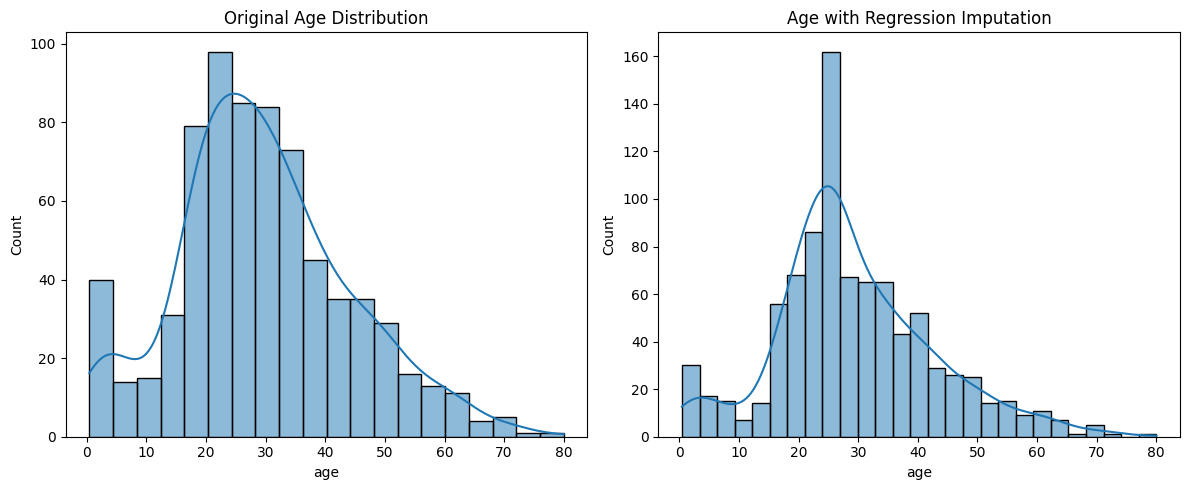

In [19]:
# Visualize original vs imputed age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(titanic_subset["age"], kde=True, ax=ax1)
ax1.set_title("Original Age Distribution")
sns.histplot(titanic_imputed["age"], kde=True, ax=ax2)
ax2.set_title("Age with Regression Imputation")
plt.tight_layout()
plt.show()

💡 **Pro Tip:** Regression imputation can capture relationships between variables, but it may overestimate the correlation between the imputed variable and the predictors.


### <a id='toc3_3_'></a>[K-Nearest Neighbors (KNN) Imputation](#toc0_)


KNN imputation can be particularly useful when there are complex relationships in the data:


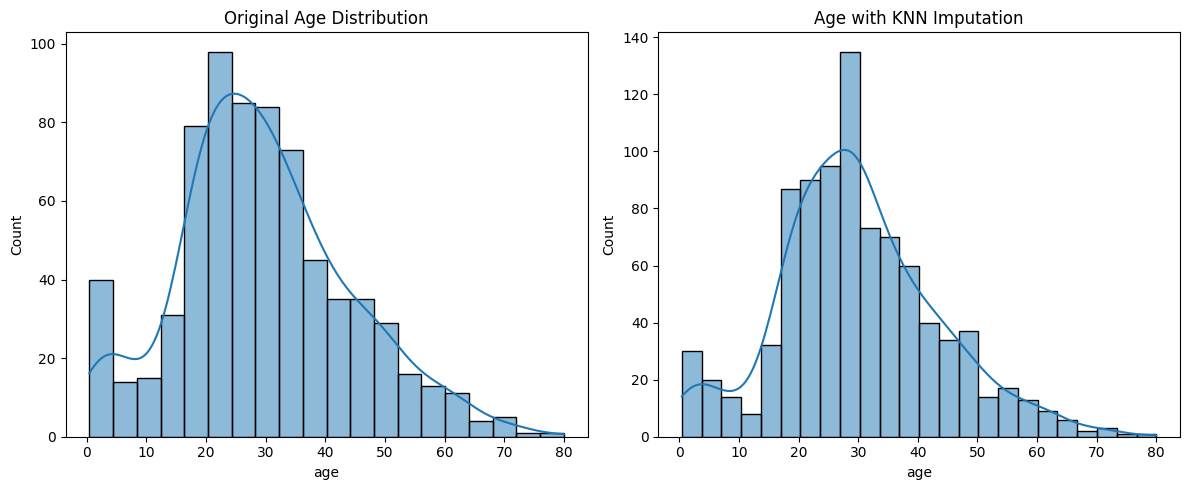

In [20]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
titanic_knn_imputed = pd.DataFrame(
    imputer.fit_transform(titanic_subset), columns=titanic_subset.columns
)

# Visualize KNN imputed age
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(titanic_subset["age"], kde=True, ax=ax1)
ax1.set_title("Original Age Distribution")
sns.histplot(titanic_knn_imputed["age"], kde=True, ax=ax2)
ax2.set_title("Age with KNN Imputation")
plt.tight_layout()
plt.show()

### <a id='toc3_4_'></a>[Time Series Imputation](#toc0_)


For time series imputation, let's use a modified version of the NYC Taxi dataset:


In [21]:
# Load and modify the flights dataset to simulate missing data
taxis = sns.load_dataset("taxis")
taxis.head()

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [22]:
taxis.isnull().sum()

pickup              0
dropoff             0
passengers          0
distance            0
fare                0
tip                 0
tolls               0
total               0
color               0
payment            44
pickup_zone        26
dropoff_zone       45
pickup_borough     26
dropoff_borough    45
dtype: int64

In [23]:
taxis.loc[2, "pickup"] = np.nan
taxis.loc[3, "pickup"] = np.nan

In [24]:
taxis.head(5)

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,NaT,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,NaT,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan


In [25]:
taxis["pickup"].ffill().head(5)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-04 16:11:55
3   2019-03-04 16:11:55
4   2019-03-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [26]:
taxis["pickup"].bfill().head(5)

0   2019-03-23 20:21:09
1   2019-03-04 16:11:55
2   2019-03-30 13:27:42
3   2019-03-30 13:27:42
4   2019-03-30 13:27:42
Name: pickup, dtype: datetime64[ns]

In [27]:
taxis["pickup"].interpolate().head(5)

0   2019-03-23 20:21:09.000000000
1   2019-03-04 16:11:55.000000000
2   2019-03-13 07:17:10.666666752
3   2019-03-21 22:22:26.333333248
4   2019-03-30 13:27:42.000000000
Name: pickup, dtype: datetime64[ns]

🤔 **Why This Matters:** Different imputation techniques can lead to different results. It's crucial to choose a method that aligns with the nature of your data and the assumptions of your analysis.


### <a id='toc3_5_'></a>[Multiple Imputation](#toc0_)


Multiple Imputation (MI) creates multiple plausible imputed datasets to reflect the uncertainty about the missing values:


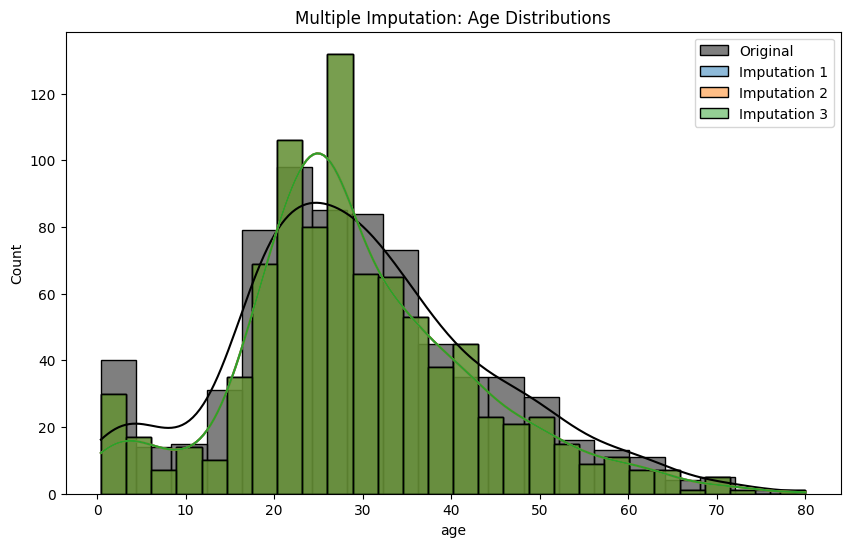

In [36]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create multiple imputed datasets
n_imputations = 3
imputed_datasets = []

for i in range(n_imputations):
    imputer = IterativeImputer(random_state=i)
    imputed_datasets.append(
        pd.DataFrame(
            imputer.fit_transform(titanic_subset), columns=titanic_subset.columns
        )
    )

# Visualize multiple imputations for age
plt.figure(figsize=(10, 6))
sns.histplot(titanic_subset["age"], kde=True, color="black", label="Original")
for i, imputed_df in enumerate(imputed_datasets):
    sns.histplot(imputed_df["age"], kde=True, alpha=0.5, label=f"Imputation {i+1}")
plt.title("Multiple Imputation: Age Distributions")
plt.legend()
plt.show()

❗️ **Important Note:** The choice of imputation technique should be guided by the nature of your data, the amount of missing data, and the intended analysis. Always validate your imputation results and consider their impact on your final conclusions.


By exploring these imputation techniques with real-world datasets, we can better understand their effects and choose the most appropriate method for our specific data and analysis needs.

## <a id='toc4_'></a>[Summary](#toc0_)

In this lecture, we've explored the critical topic of handling missing data, a common challenge in real-world datasets. Let's recap the key points and takeaways from our discussion. Here are the key concepts we covered:

1. **Understanding Missing Data**: We learned about the three types of missing data: Missing Completely at Random (MCAR), Missing at Random (MAR), and Missing Not at Random (MNAR). Understanding these types is crucial for choosing appropriate handling strategies.

2. **Detecting Missing Data**: We explored various techniques to identify and visualize missing data patterns in our datasets, using tools like pandas and missingno.

3. **Strategies for Handling Missing Data**: We discussed different approaches, including deletion methods, simple imputation, and advanced imputation techniques.

4. **Imputation Techniques**: We delved into various imputation methods, from basic approaches like mean/median imputation to more sophisticated techniques like regression imputation, K-Nearest Neighbors, and Multiple Imputation.


There's no one-size-fits-all solution for handling missing data. The choice of method depends on the nature of your data, the extent of missingness, and your analytical goals. To handle missing data properly, follow these best practices:

1. **Always investigate the missingness**: Before applying any technique, understand the pattern and potential reasons for missing data in your dataset.

2. **Consider the impact**: Evaluate how different missing data handling techniques affect your analyses and model performance.

3. **Use visualization**: Leverage visual tools to gain insights into missing data patterns and the effects of imputation.

4. **Combine methods when appropriate**: Sometimes, using a combination of techniques (e.g., different methods for different variables) can yield better results.

5. **Document your approach**: Always clearly document the methods you've used to handle missing data, as this can significantly impact your results and interpretations.


💡 **Pro Tip:** When dealing with critical analyses, consider using multiple imputation or advanced modeling techniques that can handle missing data inherently, like certain implementations of random forests.


As you continue your journey in data science and machine learning, you'll encounter various scenarios where handling missing data is crucial. The techniques we've covered provide a solid foundation, but remember that the field is continuously evolving. Stay curious and keep exploring new methods and best practices.


❗️ **Important Note:** Always validate your imputation results and consider conducting sensitivity analyses to understand how your choice of missing data handling method affects your final conclusions.


By mastering these techniques for handling missing data, you're better equipped to tackle real-world data challenges and produce more robust and reliable analyses. Remember, the goal is not just to fill in the gaps, but to do so in a way that preserves the integrity of your data and the validity of your insights.